In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_curve, auc

In [3]:
df = pd.read_csv("churn-bigml-80.csv")

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
df['Churn'] = df['Churn'].map({True: 1, False: 0})

In [6]:
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df['International plan'] = le.fit_transform(df['International plan'])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])

In [8]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [9]:
from os import XATTR_CREATE
X = df.drop('Churn', axis=1)
y = df['Churn']


In [10]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
2661,0
2662,0
2663,0
2664,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[ 1.54561458,  0.70754167, -0.53379076, ...,  0.61677678,
         0.48710358,  0.3481153 ],
       [-0.06591893, -0.58381244, -0.53379076, ...,  0.61677678,
         0.22991391, -0.42338348],
       [ 0.26981722, -1.67260119, -0.69765905, ..., -0.99915944,
         0.04040572,  2.66261165],
       ...,
       [ 0.13552276, -1.03958447,  1.69013609, ...,  0.61677678,
         1.80012455,  0.3481153 ],
       [ 0.13552276, -0.43188842,  1.69013609, ...,  0.21279273,
         1.09623702,  0.3481153 ],
       [-1.20742183, -0.40656775,  1.69013609, ..., -0.19119133,
         1.13684591,  0.3481153 ]])

In [14]:
X_test

array([[ 6.05553368e-01,  3.53052307e-01,  1.69013609e+00, ...,
         1.42474489e+00,  5.95393968e-01, -4.23383478e-01],
       [ 1.61276181e+00,  1.41652039e+00, -5.33790756e-01, ...,
         2.12792726e-01, -6.49945506e-01, -1.19488226e+00],
       [-1.54315797e+00, -4.31888423e-01, -5.33790756e-01, ...,
         2.12792726e-01,  7.71365850e-01, -4.23383478e-01],
       ...,
       [-1.67745243e+00,  7.58183007e-01,  1.69013609e+00, ...,
        -5.95175382e-01,  8.10146203e-02, -1.19488226e+00],
       [-1.27456906e+00, -2.54643742e-01, -5.33790756e-01, ...,
        -1.91191328e-01,  2.56986502e-01, -4.23383478e-01],
       [-7.37391221e-01,  7.07541670e-01, -5.33790756e-01, ...,
         6.16776780e-01, -2.03171462e-04, -4.23383478e-01]])

In [15]:
model = LogisticRegression(max_iter=1000)


In [16]:
model

LogisticRegression(max_iter=1000)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0],
    "Odds_Ratio": np.exp(model.coef_[0])
})

print(coeff_df.sort_values(by="Odds_Ratio", ascending=False))

                   Feature  Coefficient  Odds_Ratio
3       International plan     0.667418    1.949199
18  Customer service calls     0.622184    1.862992
6        Total day minutes     0.371052    1.449259
8         Total day charge     0.370157    1.447962
5    Number vmail messages     0.328090    1.388315
17       Total intl charge     0.150671    1.162614
9        Total eve minutes     0.144267    1.155193
11        Total eve charge     0.142849    1.153555
15      Total intl minutes     0.139844    1.150095
12     Total night minutes     0.076498    1.079500
14      Total night charge     0.074716    1.077578
7          Total day calls     0.074447    1.077289
1           Account length     0.041977    1.042870
10         Total eve calls     0.014832    1.014943
0                    State     0.000479    1.000479
13       Total night calls    -0.035473    0.965149
2                Area code    -0.053273    0.948121
16        Total intl calls    -0.281862    0.754377
4          V

In [19]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [20]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [21]:
y_prob

array([0.83303293, 0.3033633 , 0.04722946, 0.40040391, 0.3207423 ,
       0.38629144, 0.01937046, 0.27237661, 0.1150331 , 0.16347153,
       0.16731705, 0.0908499 , 0.023911  , 0.05167812, 0.68287259,
       0.24397535, 0.18725786, 0.02695411, 0.37054043, 0.02390412,
       0.03377226, 0.02275117, 0.01221528, 0.44378552, 0.03272758,
       0.12098399, 0.0425569 , 0.41025159, 0.07053102, 0.13791635,
       0.08671899, 0.08134995, 0.08864783, 0.40037776, 0.06708327,
       0.06214571, 0.3727242 , 0.05396836, 0.08784487, 0.09407696,
       0.04114198, 0.09711378, 0.29581957, 0.01031541, 0.14609138,
       0.07614984, 0.64938289, 0.15074202, 0.03744518, 0.08781956,
       0.07891036, 0.15590835, 0.03205151, 0.01746546, 0.0581375 ,
       0.16212231, 0.02758058, 0.18234748, 0.19071718, 0.00504998,
       0.01428248, 0.11303001, 0.00980408, 0.07401768, 0.52247359,
       0.12766164, 0.08363775, 0.03652792, 0.02482145, 0.1928048 ,
       0.40168695, 0.0061983 , 0.10054327, 0.00960411, 0.29865

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8595505617977528


In [23]:
print(confusion_matrix(y_test, y_pred))

[[441  14]
 [ 61  18]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       455
           1       0.56      0.23      0.32        79

    accuracy                           0.86       534
   macro avg       0.72      0.60      0.62       534
weighted avg       0.83      0.86      0.83       534



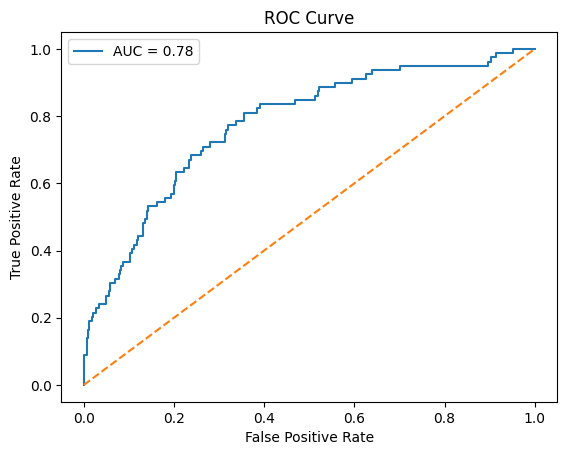

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()